In [ ]:
from IPython.display import Image, display
import os

results_dir = '/kaggle/input/safewalkbd-002/runs/detect/train'

for file in os.listdir(results_dir)[:20]:  # عرض أول 10 صور
    if file.endswith('.jpg'):
        display(Image(filename=os.path.join(results_dir, file)))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.9 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 24.12.0 requires pylibraft-cu12==24.12.*, but you have pylibraft-cu12 25.2.0 which is 

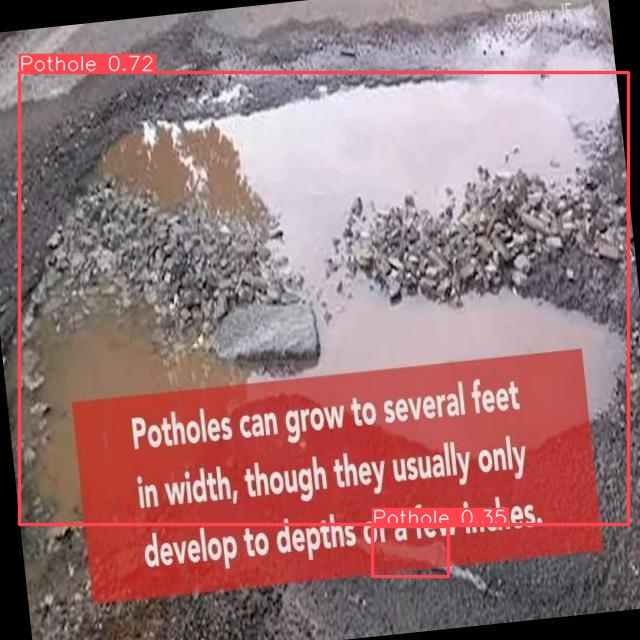

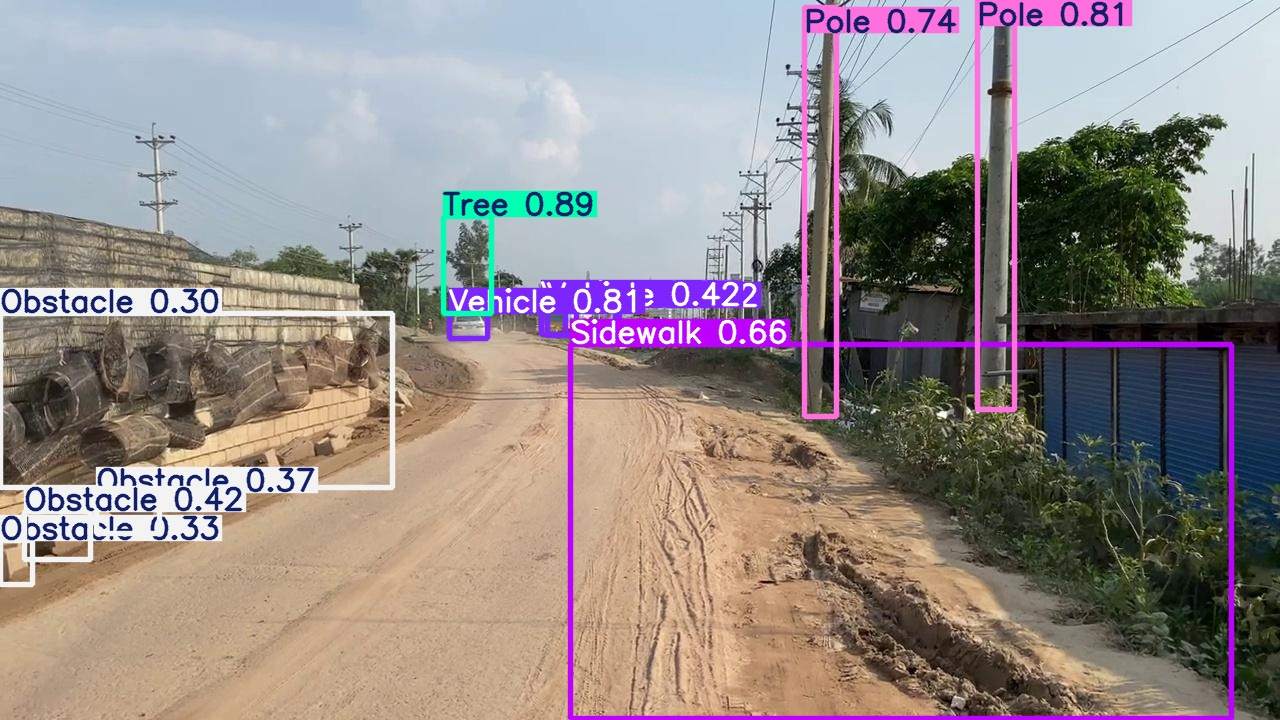

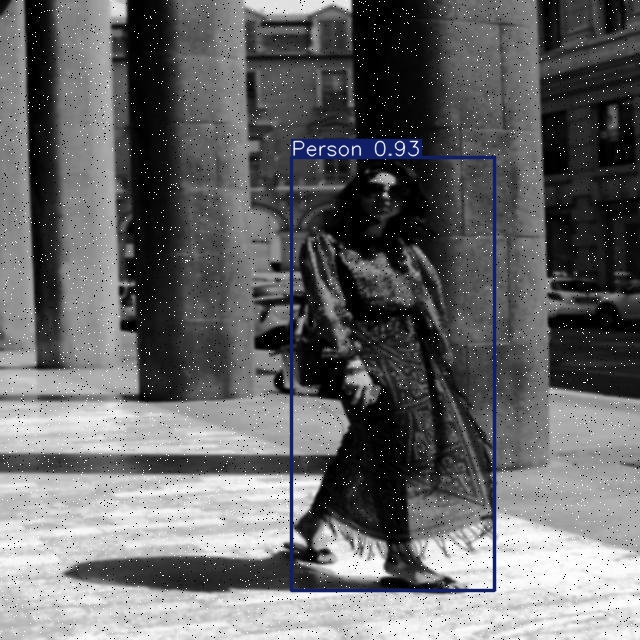

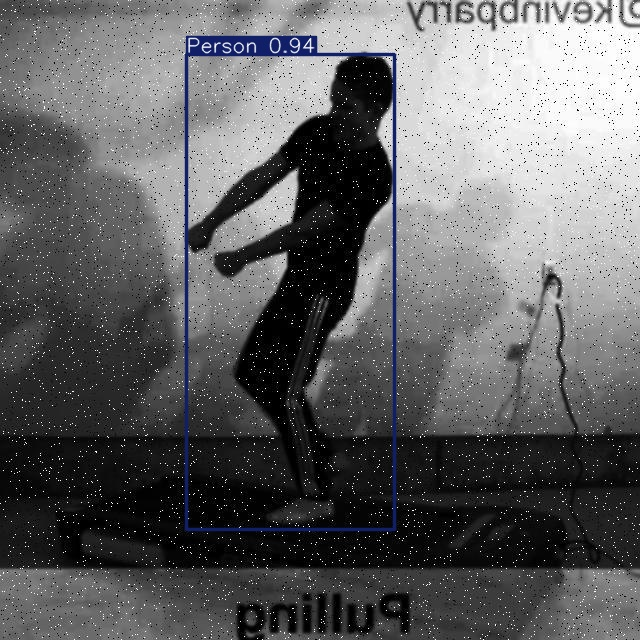

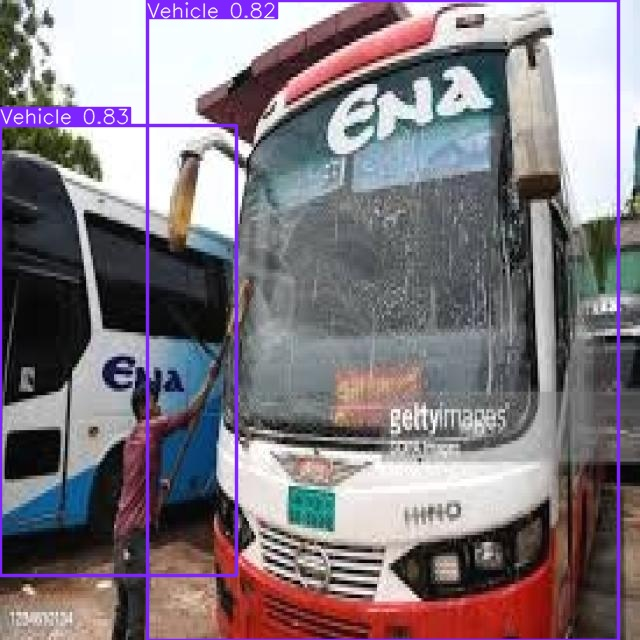

In [1]:
# Install Ultralytics if not already available
!pip install -q ultralytics

# Import dependencies
from ultralytics import YOLO
import os
from IPython.display import Image, display
import glob

# Load the trained YOLOv8 model
model = YOLO('/kaggle/input/safewalkbd-002/runs/detect/train/weights/best.pt')

# Run inference on test images
results = model.predict(
    source='/kaggle/input/safewalkbd-002/SafeWalkBD-8/test/images',  # test images
    conf=0.25,     # confidence threshold (adjust if needed)
    save=True,     # save the predictions
    save_txt=True  # save txt with predictions
)

# Get the directory where predictions are saved
output_dir = results[0].save_dir  # should be like "runs/detect/predict"

# Show a few predicted images
predicted_images = glob.glob(f'{output_dir}/*.jpg')

# Display the first 5 results
for img_path in predicted_images[:5]:
    display(Image(filename=img_path))


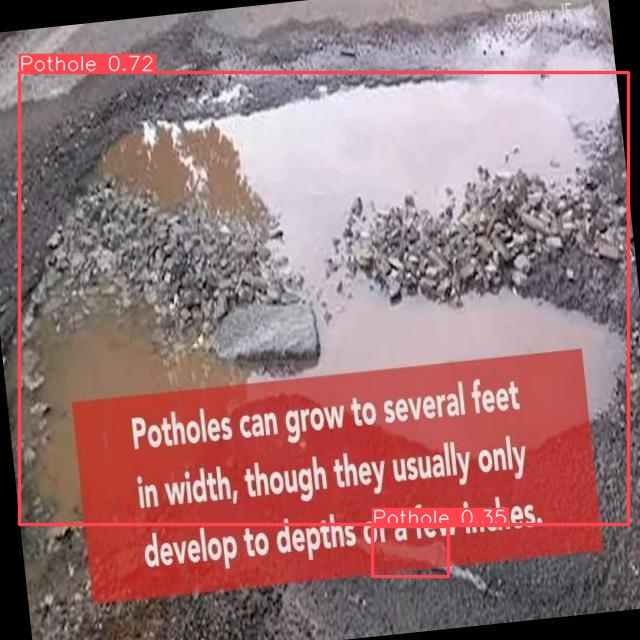

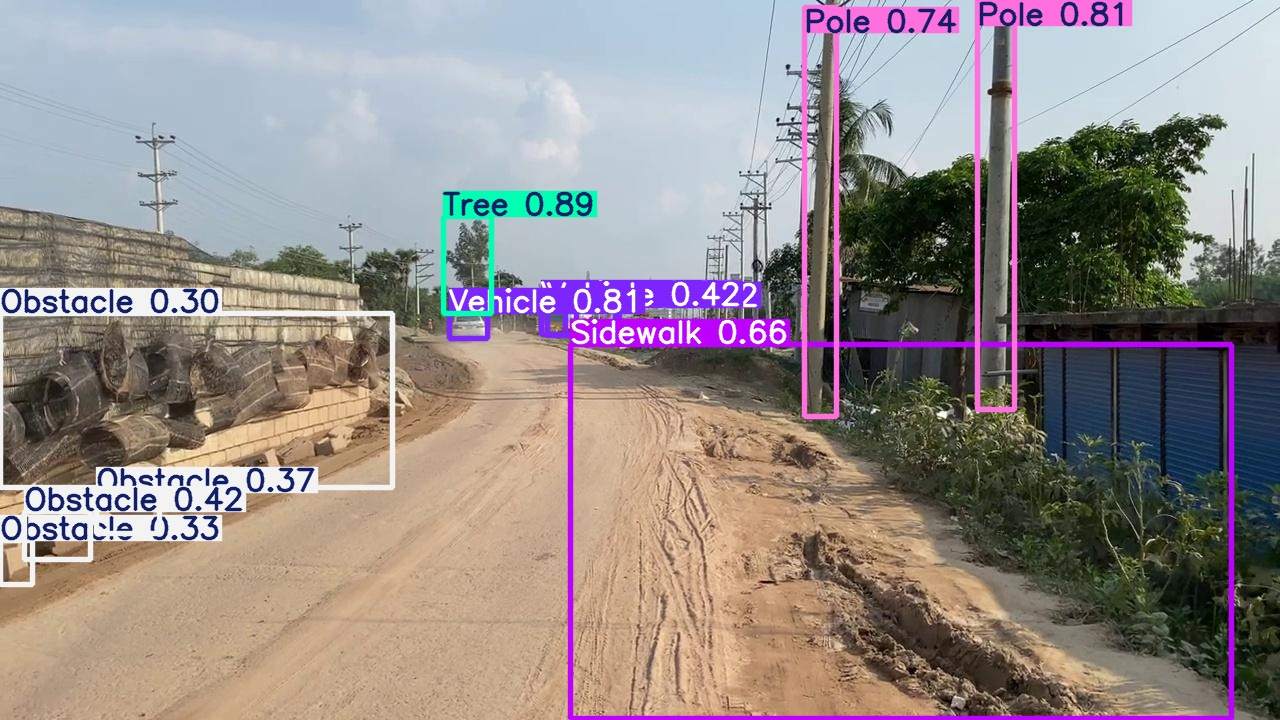

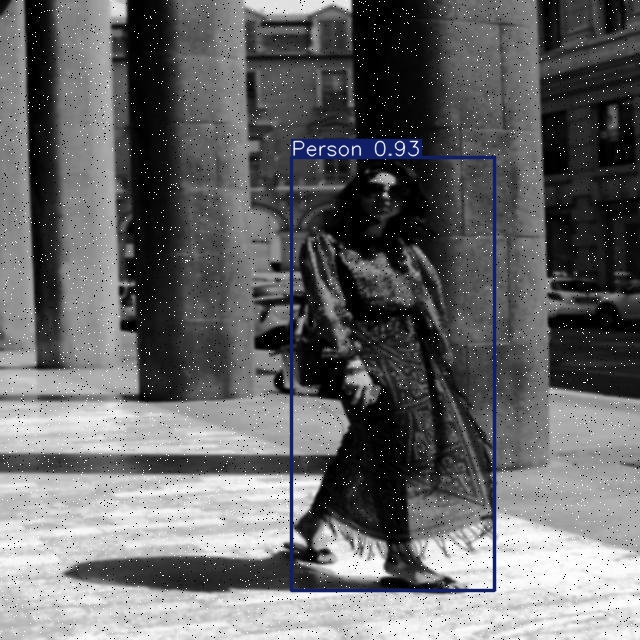

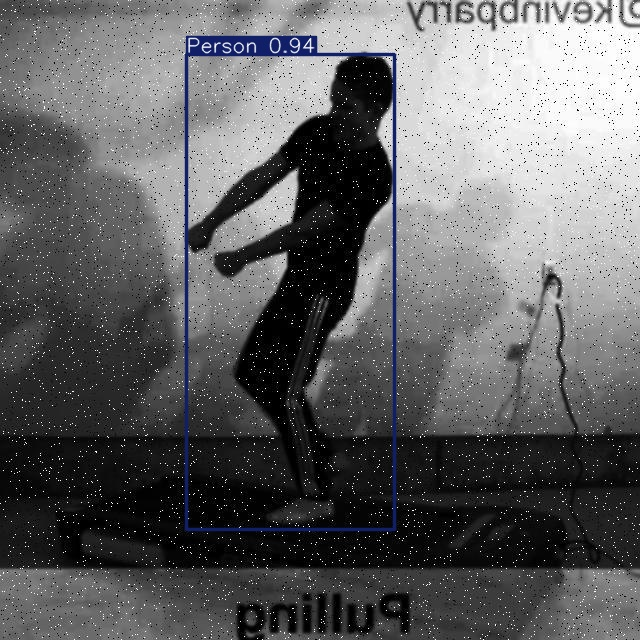

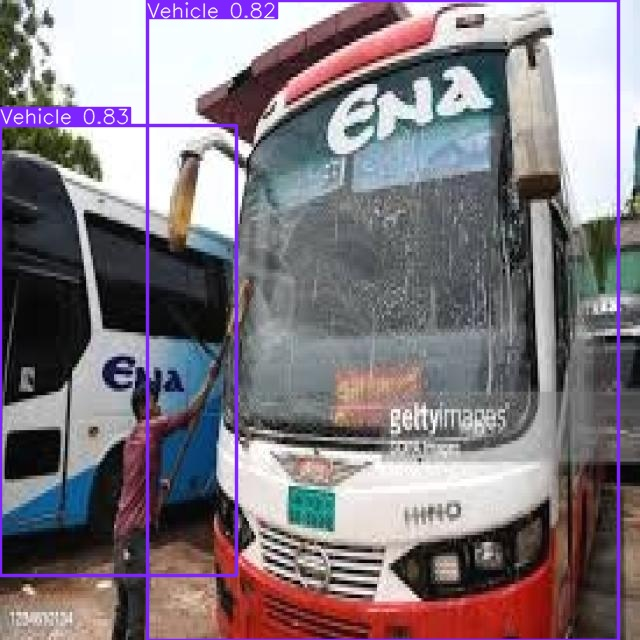

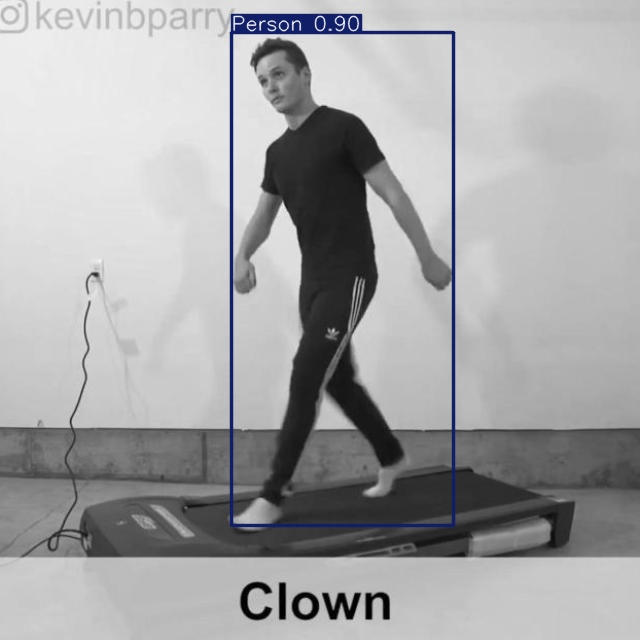

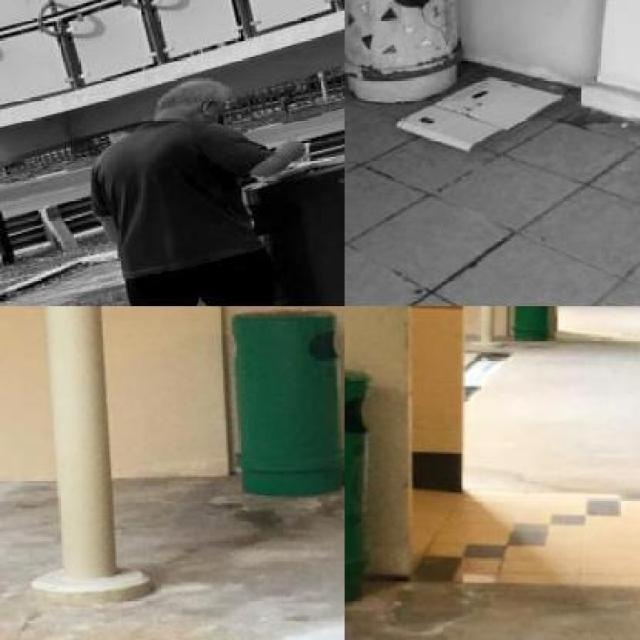

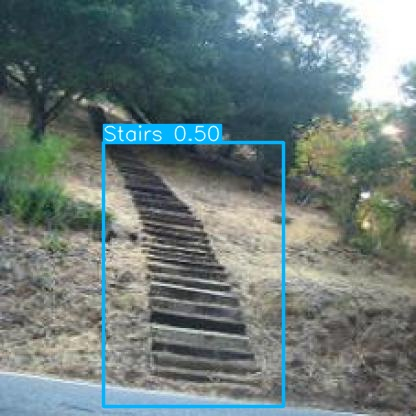

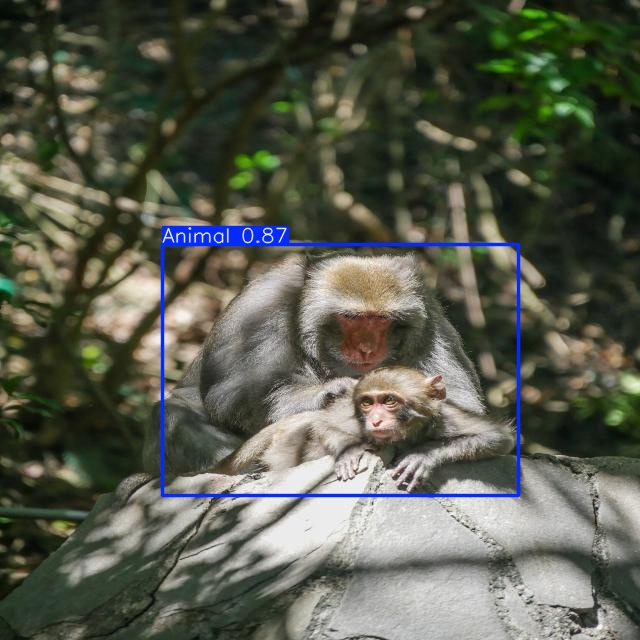

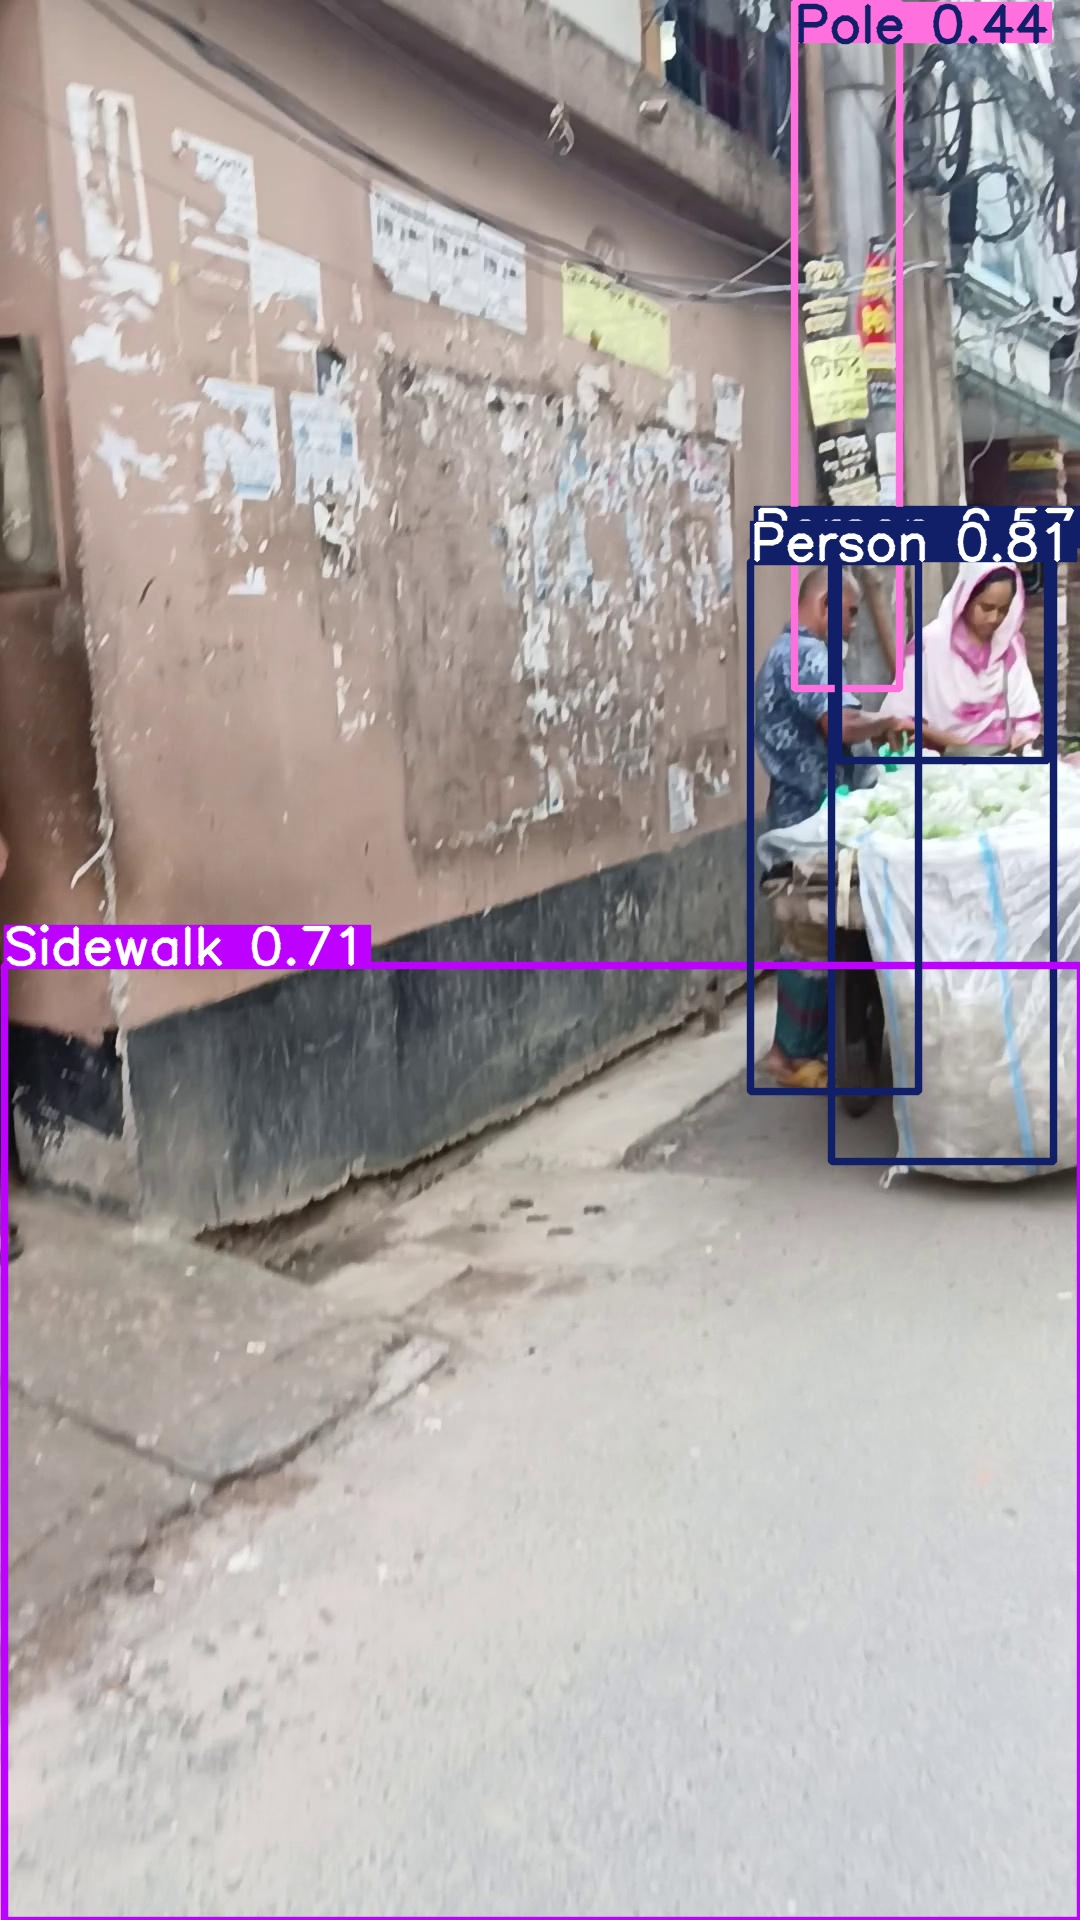

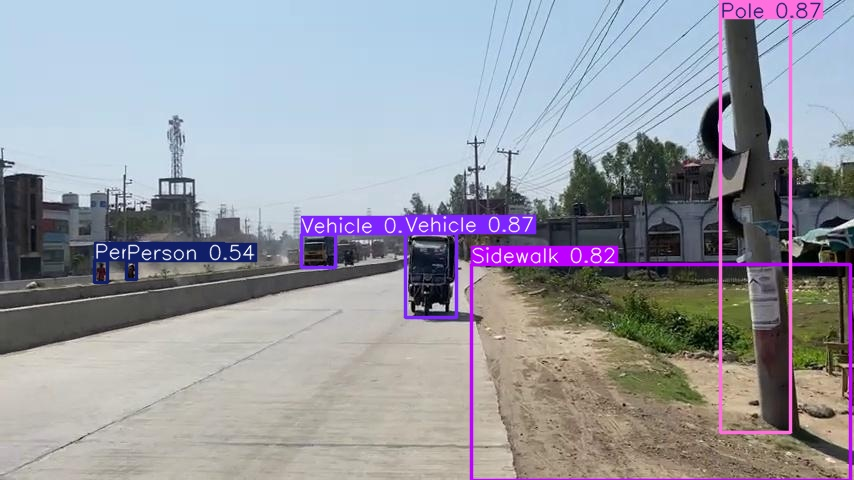

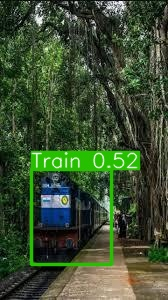

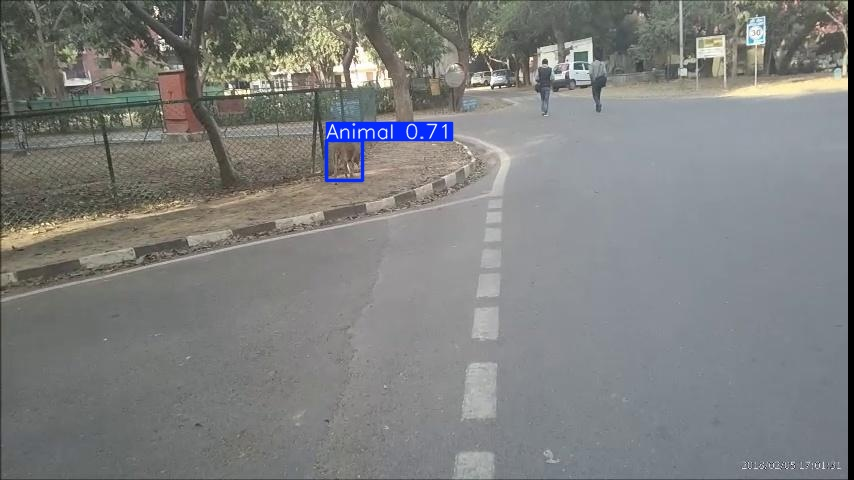

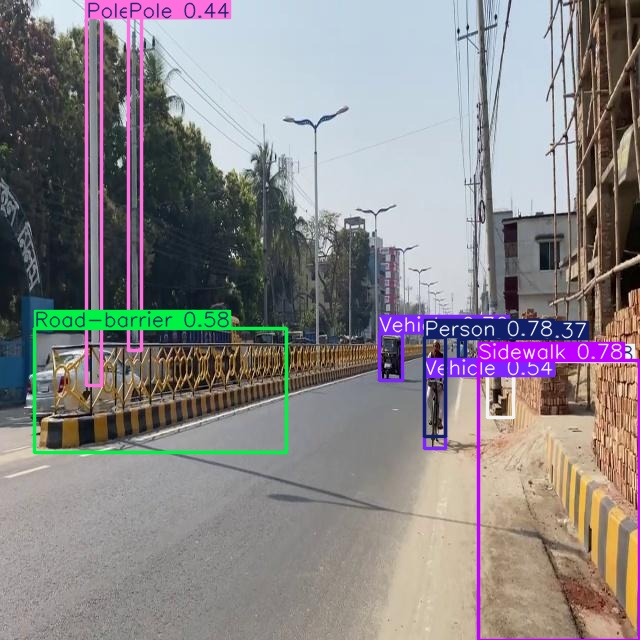

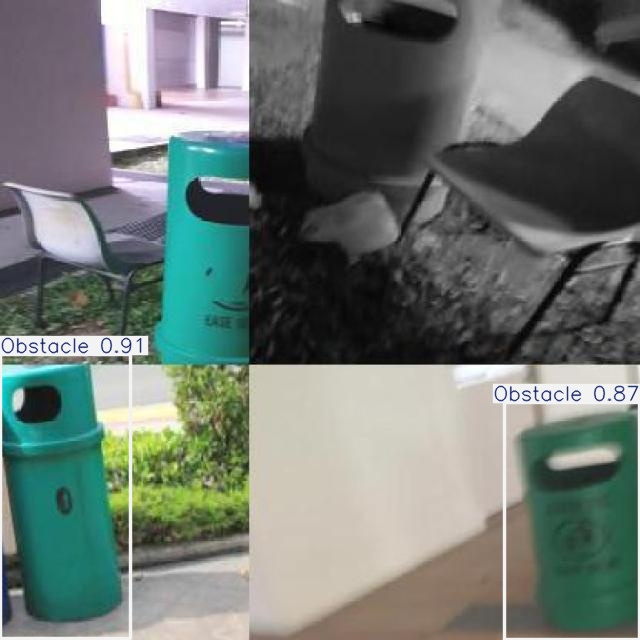

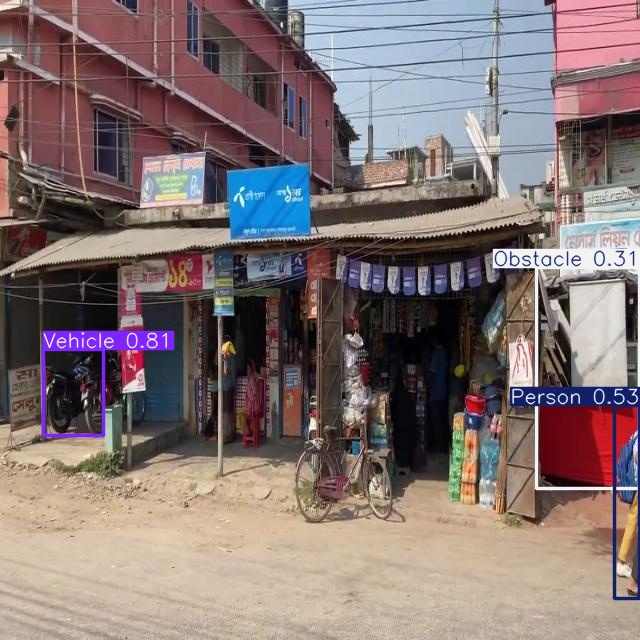

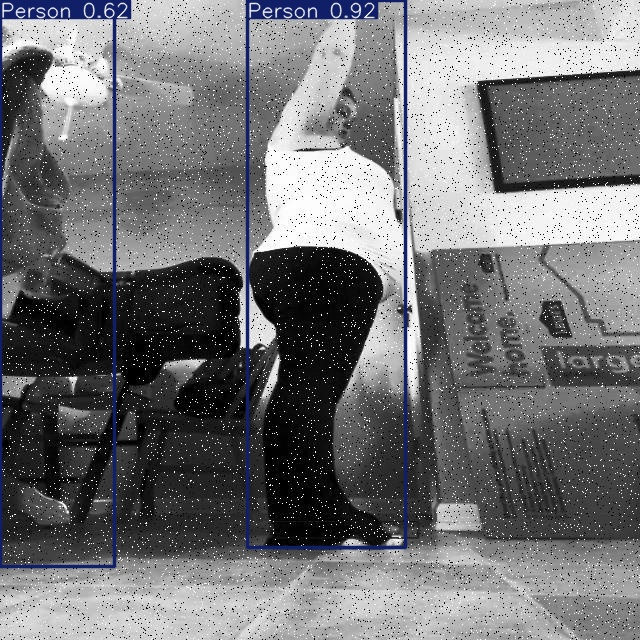

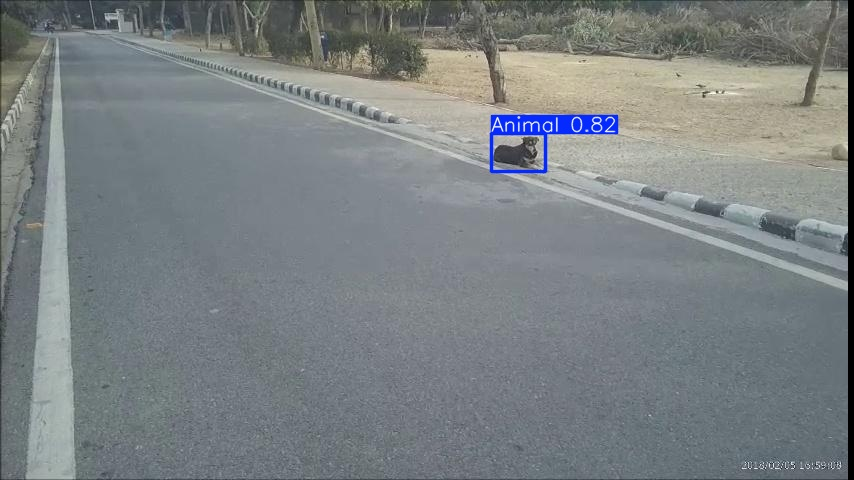

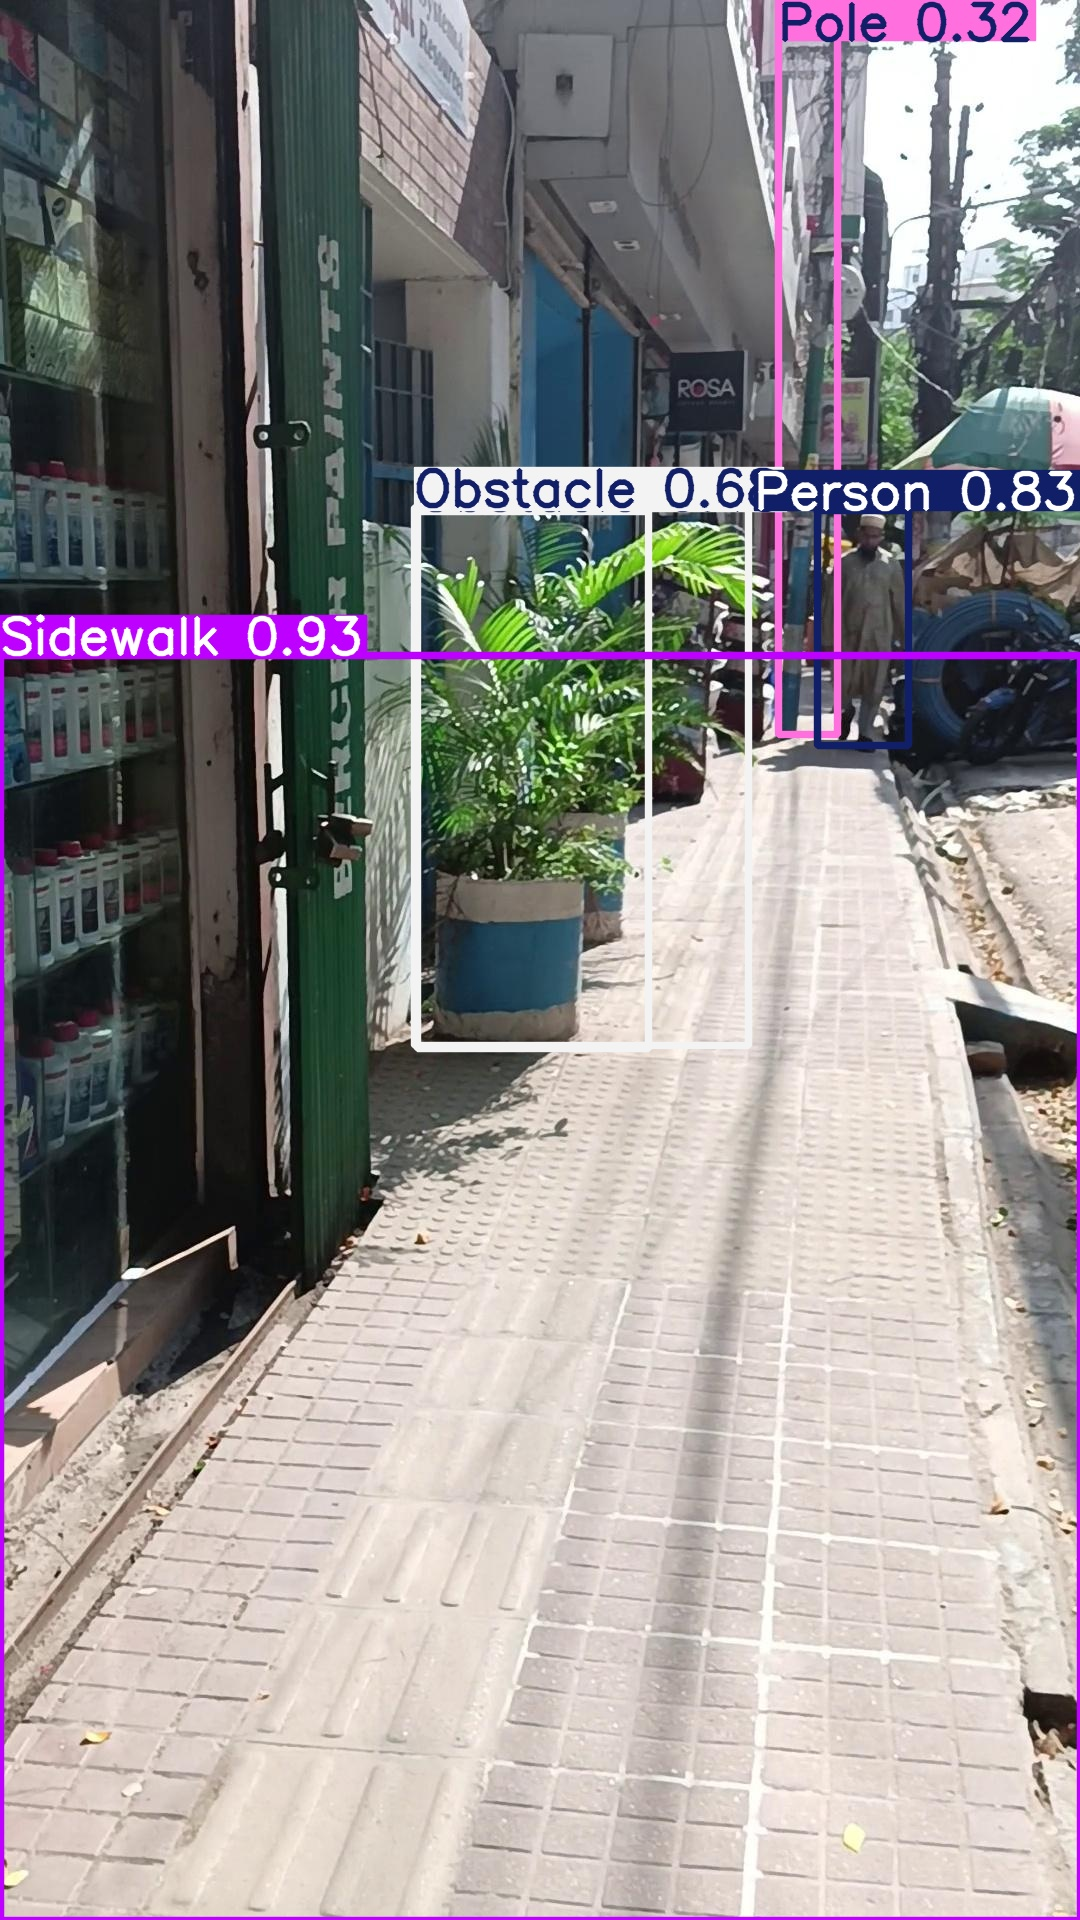

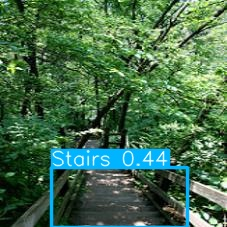

In [2]:
# Display the first 5 results
for img_path in predicted_images[:20]:
    display(Image(filename=img_path))


In [3]:
import shutil

# Zip the best.pt model file
shutil.copy("/kaggle/input/safewalkbd-002/runs/detect/train/weights/best.pt", "best.pt")
shutil.make_archive("yolo_model", 'zip', root_dir='.', base_dir='best.pt')


'/kaggle/working/yolo_model.zip'